## Homework
1. Create a graphical skeleton like the one created above using the Economic Freedom of the World Index and Real GDP.
2. Create a directed acyclic graph using the same data. Include partial correlations as explained in the D-Separation.

imports

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import pandas_datareader.data as web
import datetime

grab previously pulled data from saved CSV

In [2]:
freedom_data = pd.read_csv("cleanedEconFreedomData (1).csv", 
                   index_col = [0,1], 
                   parse_dates = True)
years = np.array(sorted(list(set(freedom_data.index.get_level_values("Year")))))
years = pd.date_range(years[0], years[-2], freq = "AS")
countries = sorted(list(set(freedom_data.index.get_level_values("ISO_Code"))))
index_names = list(freedom_data.index.names)
multi_index = pd.MultiIndex.from_product(
    [countries, years[:-1]], names = freedom_data.index.names)
usa_freedom = freedom_data.loc["USA"]
efw_index = pd.DataFrame(usa_freedom)
efw_index

,EFW,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
Year,,,,,,
2017-01-01,8.196365,7.157599,7.436473,9.799038,7.674580,8.914133
2016-01-01,8.183442,7.138582,7.396209,9.847874,7.653328,8.881217
2015-01-01,8.085664,7.121655,7.226306,9.761051,7.535949,8.783357
2014-01-01,7.969703,7.126057,7.099625,9.389649,7.573566,8.659619
2013-01-01,7.900998,7.097752,6.974508,9.420297,7.374713,8.637721
2012-01-01,8.012288,7.565472,7.016540,9.323542,7.699527,8.456360
2011-01-01,7.906265,7.260760,6.957723,9.305630,7.711284,8.295927
2010-01-01,7.972577,7.108888,7.143095,9.678239,7.720760,8.211905
2009-01-01,7.965853,7.147290,7.188374,9.604751,7.723552,8.165299


In [3]:
gdp_data = web.DataReader('gdp', 'fred', datetime.datetime(1970,1,1), datetime.datetime.today())

In [4]:
gdp_data

,gdp
DATE,
1970-01-01,1051.200
1970-04-01,1067.375
1970-07-01,1086.059
1970-10-01,1088.608
1971-01-01,1135.156
...,...
2020-07-01,21138.574
2020-10-01,21477.597
2021-01-01,22038.226


In [5]:
gdp_data1 = gdp_data.loc[usa_freedom.index]
gdp_data1

,gdp
Year,
2017-01-01,19153.912
2016-01-01,18425.306
2015-01-01,17991.348
2014-01-01,17144.281
2013-01-01,16629.050
2012-01-01,16068.824
2011-01-01,15351.444
2010-01-01,14764.611
2009-01-01,14430.901


In [6]:
gdp_data1

,gdp
Year,
2017-01-01,19153.912
2016-01-01,18425.306
2015-01-01,17991.348
2014-01-01,17144.281
2013-01-01,16629.050
2012-01-01,16068.824
2011-01-01,15351.444
2010-01-01,14764.611
2009-01-01,14430.901


data is in the correct index so now we can run regressions and stuff 

In [7]:
df = efw_index.combine_first(np.log(gdp_data1))

In [8]:
df

,EFW,Freedom to trade internationally,Legal System & Property Rights,Regulation,Size of Government,Sound Money,gdp
Year,,,,,,,
2017-01-01,8.196365,7.674580,7.436473,8.914133,7.157599,9.799038,9.860262
2016-01-01,8.183442,7.653328,7.396209,8.881217,7.138582,9.847874,9.821480
2015-01-01,8.085664,7.535949,7.226306,8.783357,7.121655,9.761051,9.797646
2014-01-01,7.969703,7.573566,7.099625,8.659619,7.126057,9.389649,9.749420
2013-01-01,7.900998,7.374713,6.974508,8.637721,7.097752,9.420297,9.718906
2012-01-01,8.012288,7.699527,7.016540,8.456360,7.565472,9.323542,9.684636
2011-01-01,7.906265,7.711284,6.957723,8.295927,7.260760,9.305630,9.638965
2010-01-01,7.972577,7.720760,7.143095,8.211905,7.108888,9.678239,9.599988
2009-01-01,7.965853,7.723552,7.188374,8.165299,7.147290,9.604751,9.577127


In [9]:
df.corr()

,EFW,Freedom to trade internationally,Legal System & Property Rights,Regulation,Size of Government,Sound Money,gdp
EFW,1.000000,0.277031,0.540252,0.730687,0.835378,0.735413,0.577267
Freedom to trade internationally,0.277031,1.000000,0.788377,-0.235293,-0.182762,0.082507,-0.571411
Legal System & Property Rights,0.540252,0.788377,1.000000,-0.037064,0.070761,0.479455,-0.270876
Regulation,0.730687,-0.235293,-0.037064,1.000000,0.740867,0.391714,0.833219
Size of Government,0.835378,-0.182762,0.070761,0.740867,1.000000,0.608766,0.838803
Sound Money,0.735413,0.082507,0.479455,0.391714,0.608766,1.000000,0.399252
gdp,0.577267,-0.571411,-0.270876,0.833219,0.838803,0.399252,1.000000


In [10]:
import statsmodels.api as sm

residuals = {}
for y_var in df.keys():
    X_vars = list(df.keys())
    X_vars.remove(y_var)
    X = df[X_vars]
    # Initial estimate should include constant
    #   This won't be the case we regress the errors
    X["Constant"] = 1
    # pass y_var as list for consistent structure
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)

In [11]:
residuals

,EFW,Freedom to trade internationally,Legal System & Property Rights,Regulation,Size of Government,Sound Money,gdp
Year,,,,,,,
2017-01-01,-0.000836,0.003572,0.004298,0.004580,0.002933,0.006937,0.053087
2016-01-01,-0.000582,0.002578,0.002496,0.003380,0.001529,0.006811,0.047474
2015-01-01,-0.000940,0.003097,0.004579,0.005236,0.004079,0.007387,-0.031977
2014-01-01,-0.003182,0.013105,0.017249,0.015681,0.016909,0.012670,-0.081867
2013-01-01,-0.003415,0.011355,0.019043,0.017673,0.019000,0.013778,-0.263577
2012-01-01,0.001032,-0.006671,-0.004431,-0.005267,-0.003659,-0.010077,-0.053157
2011-01-01,-0.000524,0.003863,0.002185,0.001110,0.002954,-0.000501,0.133587
2010-01-01,0.001630,-0.004190,-0.010278,-0.009891,-0.010140,-0.004793,0.318375
2009-01-01,0.001513,-0.004891,-0.008630,-0.009287,-0.008947,-0.006284,0.273514


In [12]:
residuals.corr()[residuals.corr().abs() < 1].mul(-1).fillna(1).round(2)

,EFW,Freedom to trade internationally,Legal System & Property Rights,Regulation,Size of Government,Sound Money,gdp
EFW,1.00,0.99,1.00,1.00,1.00,0.99,-0.29
Freedom to trade internationally,0.99,1.00,-0.97,-0.98,-0.98,-0.99,0.18
Legal System & Property Rights,1.00,-0.97,1.00,-0.99,-0.99,-0.98,0.31
Regulation,1.00,-0.98,-0.99,1.00,-1.00,-0.99,0.34
Size of Government,1.00,-0.98,-0.99,-1.00,1.00,-0.98,0.34
Sound Money,0.99,-0.99,-0.98,-0.99,-0.98,1.00,0.25
gdp,-0.29,0.18,0.31,0.34,0.34,0.25,1.00


In [13]:
import pingouin
df.pcorr().round(2)

,EFW,Freedom to trade internationally,Legal System & Property Rights,Regulation,Size of Government,Sound Money,gdp
EFW,1.00,0.99,1.00,1.00,1.00,0.99,-0.29
Freedom to trade internationally,0.99,1.00,-0.97,-0.98,-0.98,-0.99,0.18
Legal System & Property Rights,1.00,-0.97,1.00,-0.99,-0.99,-0.98,0.31
Regulation,1.00,-0.98,-0.99,1.00,-1.00,-0.99,0.34
Size of Government,1.00,-0.98,-0.99,-1.00,1.00,-0.98,0.34
Sound Money,0.99,-0.99,-0.98,-0.99,-0.98,1.00,0.25
gdp,-0.29,0.18,0.31,0.34,0.34,0.25,1.00


C:\Users\jzach\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


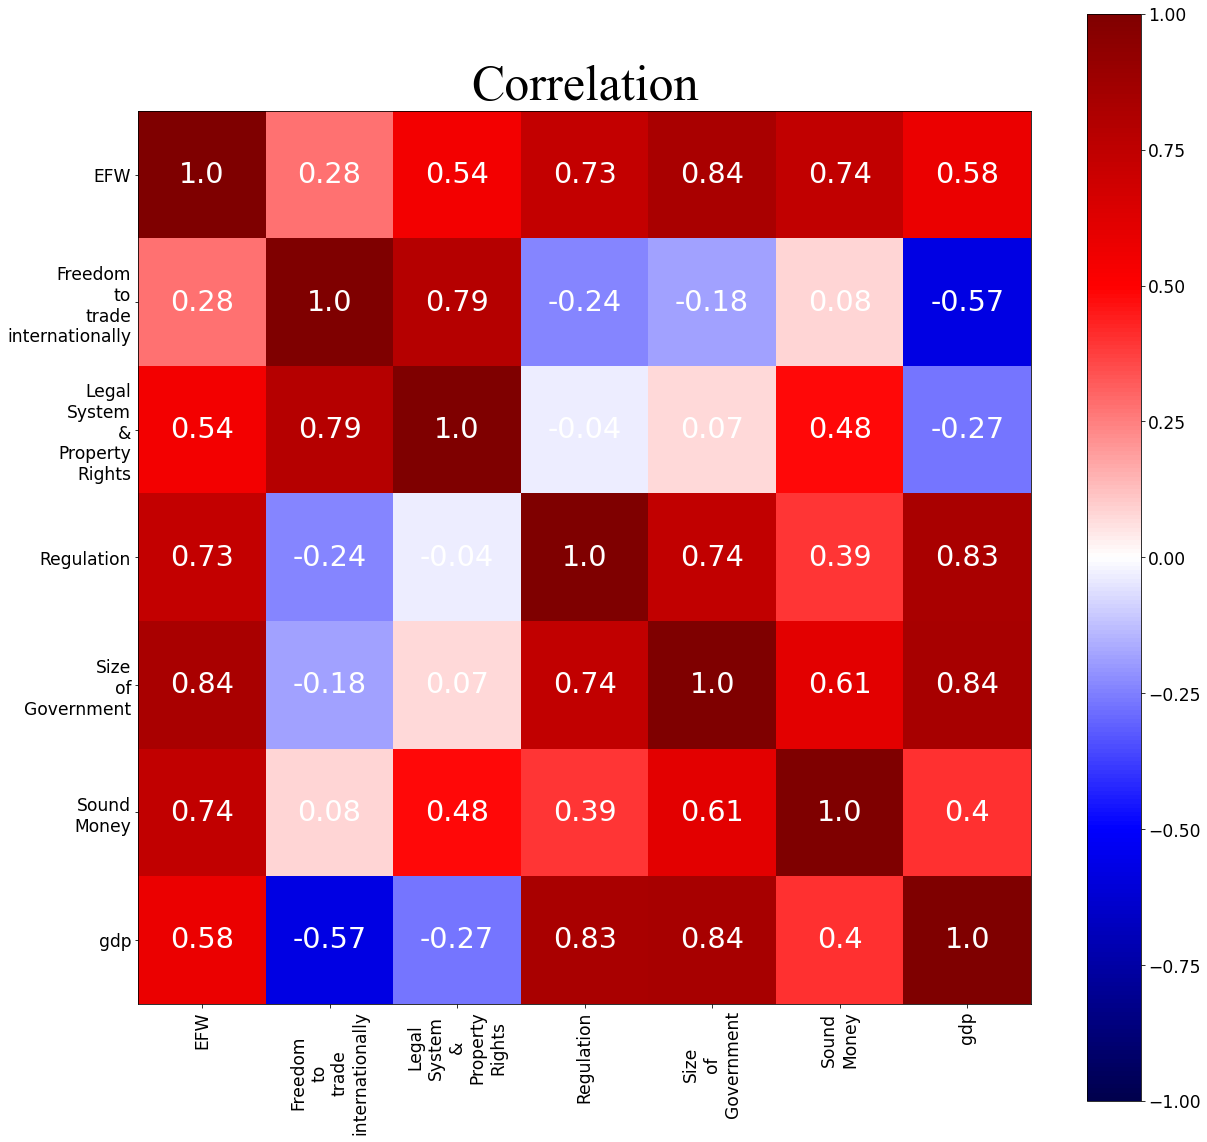

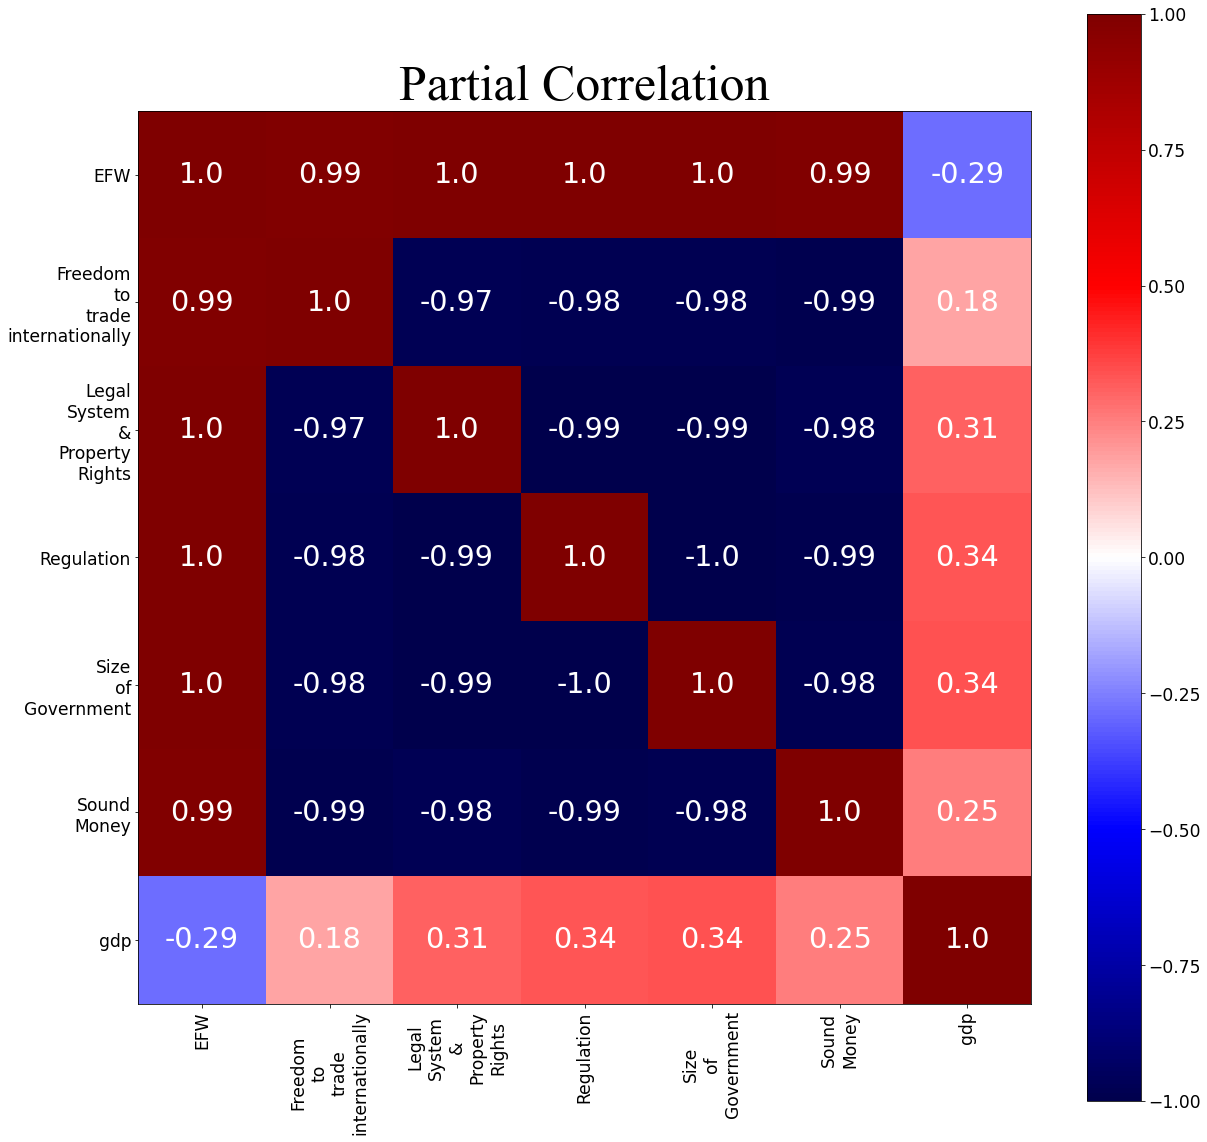

In [14]:
from datlib.plots import *
corr_matrix_heatmap(df.corr(), save_fig = False, pp = None, title = "Correlation")
corr_matrix_heatmap(df.pcorr(), save_fig = False, pp = None, title = "Partial Correlation")

In [15]:
residuals


,EFW,Freedom to trade internationally,Legal System & Property Rights,Regulation,Size of Government,Sound Money,gdp
Year,,,,,,,
2017-01-01,-0.000836,0.003572,0.004298,0.004580,0.002933,0.006937,0.053087
2016-01-01,-0.000582,0.002578,0.002496,0.003380,0.001529,0.006811,0.047474
2015-01-01,-0.000940,0.003097,0.004579,0.005236,0.004079,0.007387,-0.031977
2014-01-01,-0.003182,0.013105,0.017249,0.015681,0.016909,0.012670,-0.081867
2013-01-01,-0.003415,0.011355,0.019043,0.017673,0.019000,0.013778,-0.263577
2012-01-01,0.001032,-0.006671,-0.004431,-0.005267,-0.003659,-0.010077,-0.053157
2011-01-01,-0.000524,0.003863,0.002185,0.001110,0.002954,-0.000501,0.133587
2010-01-01,0.001630,-0.004190,-0.010278,-0.009891,-0.010140,-0.004793,0.318375
2009-01-01,0.001513,-0.004891,-0.008630,-0.009287,-0.008947,-0.006284,0.273514


In [16]:
pcorr_pvalues = {}
for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            pcorr_pvalues[y][x] = sm.OLS(Y,X).fit().pvalues[x]
        
        else:
            pcorr_pvalues[y][x] = np.NaN
pd.DataFrame(pcorr_pvalues).round(2)

,EFW,Freedom to trade internationally,Legal System & Property Rights,Regulation,Size of Government,Sound Money,gdp
EFW,NaN,0.0,0.00,0.0,0.0,0.00,0.17
Freedom to trade internationally,0.00,NaN,0.00,0.0,0.0,0.00,0.40
Legal System & Property Rights,0.00,0.0,NaN,0.0,0.0,0.00,0.13
Regulation,0.00,0.0,0.00,NaN,0.0,0.00,0.10
Size of Government,0.00,0.0,0.00,0.0,NaN,0.00,0.10
Sound Money,0.00,0.0,0.00,0.0,0.0,NaN,0.22
gdp,0.17,0.4,0.13,0.1,0.1,0.22,NaN


In [17]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in df.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)

undirected_graph           


{'EFW': ['Freedom to trade internationally',
  'Legal System & Property Rights',
  'Regulation',
  'Size of Government',
  'Sound Money',
  'gdp'],
 'Freedom to trade internationally': ['EFW',
  'Legal System & Property Rights',
  'Regulation',
  'Size of Government',
  'Sound Money',
  'gdp'],
 'Legal System & Property Rights': ['EFW',
  'Freedom to trade internationally',
  'Regulation',
  'Size of Government',
  'Sound Money',
  'gdp'],
 'Regulation': ['EFW',
  'Freedom to trade internationally',
  'Legal System & Property Rights',
  'Size of Government',
  'Sound Money',
  'gdp'],
 'Size of Government': ['EFW',
  'Freedom to trade internationally',
  'Legal System & Property Rights',
  'Regulation',
  'Sound Money',
  'gdp'],
 'Sound Money': ['EFW',
  'Freedom to trade internationally',
  'Legal System & Property Rights',
  'Regulation',
  'Size of Government',
  'gdp'],
 'gdp': ['EFW',
  'Freedom to trade internationally',
  'Legal System & Property Rights',
  'Regulation',
  'Siz

In [18]:
import copy
import pingouin
p_val = .01
def build_skeleton(df, undirected_graph):    
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        c_used = copy.copy(controls_used)
        for c_var in control_vars:
            if y not in undirected_graph[x]:
                break
            c_used.append(c_var)
            test = df.partial_corr(x = x, y = y, covar=c_used,
                                  method = "pearson")
            if test["p-val"].values[0] > p_val: 

                undirected_graph[x].remove(y)
                #breakout of the for 
                break
            else:
                remaining_controls = copy.copy(control_vars)
                remaining_controls.remove(c_var)
                # recursive function that iterates through remaining variables 
                #  uses them as controls statistical significance holds without them,
                #  otherwise break
                check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)
    d_sep = {}
    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            d_sep[(x,y)] = []

            if x != y:
            # first check for correlation with no controls
                test = df.partial_corr(x = x, y = y, covar = None,method = "pearson") 
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
            # if correlated check for deseparation controlling for other variables
                else:

                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

undirected_graph = build_skeleton(df, undirected_graph)                                   
undirected_graph

{'EFW': ['Legal System & Property Rights',
  'Regulation',
  'Size of Government',
  'Sound Money'],
 'Freedom to trade internationally': [],
 'Legal System & Property Rights': ['EFW'],
 'Regulation': ['EFW'],
 'Size of Government': ['EFW'],
 'Sound Money': ['EFW'],
 'gdp': []}

In [19]:
import matplotlib.pyplot as plt
import networkx as nx
def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    
    # generate partial correlation matrix to draw values from
    # for graph edges
    pcorr_matrix = df.pcorr()
    graph = nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key.replace(" ","\n"), key2[0].replace(" ","\n"))
                edges.append(edge)
                # edge label is partial correlation between
                # key and key2
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2],2))

    # edge format: ("i", "j") --> from node i to node j
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 20)
    nx.draw_networkx(graph, pos, node_color=color_map, 
                     node_size = 10000,
                     with_labels=True,  arrows=False,
                     font_size = 20, alpha = 1,
                     font_color = "white",
                     ax = ax)
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20)
    plt.savefig("g1.png", format="PNG")
    plt.show()


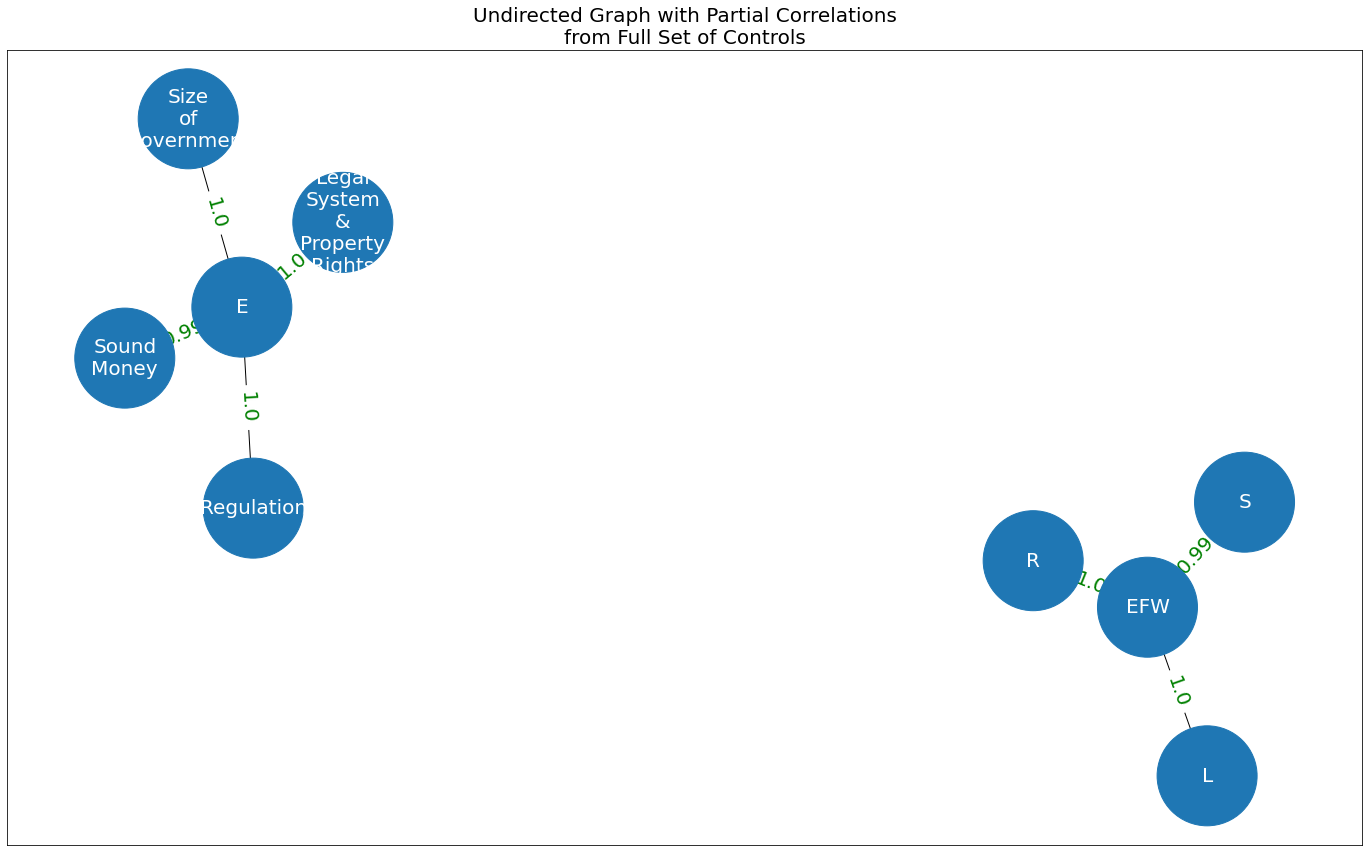

In [20]:
graph_DAG(undirected_graph, df, title = "Undirected Graph with Partial Correlations\nfrom Full Set of Controls")

In [21]:
from pgmpy.estimators import PC
c = PC(df)
max_cond_vars = len(df.keys()) - 2


model = c.estimate(return_type = "dag",variant= "orig", 
                   significance_level = p_val, 
                   max_cond_vars = max_cond_vars, ci_test = "pearsonr")
edges = model.edges()


  0%|          | 0/5 [00:00<?, ?it/s]

OutEdgeView([('Regulation', 'gdp'), ('Regulation', 'EFW'), ('Size of Government', 'gdp'), ('Sound Money', 'EFW'), ('Freedom to trade internationally', 'Legal System & Property Rights')])

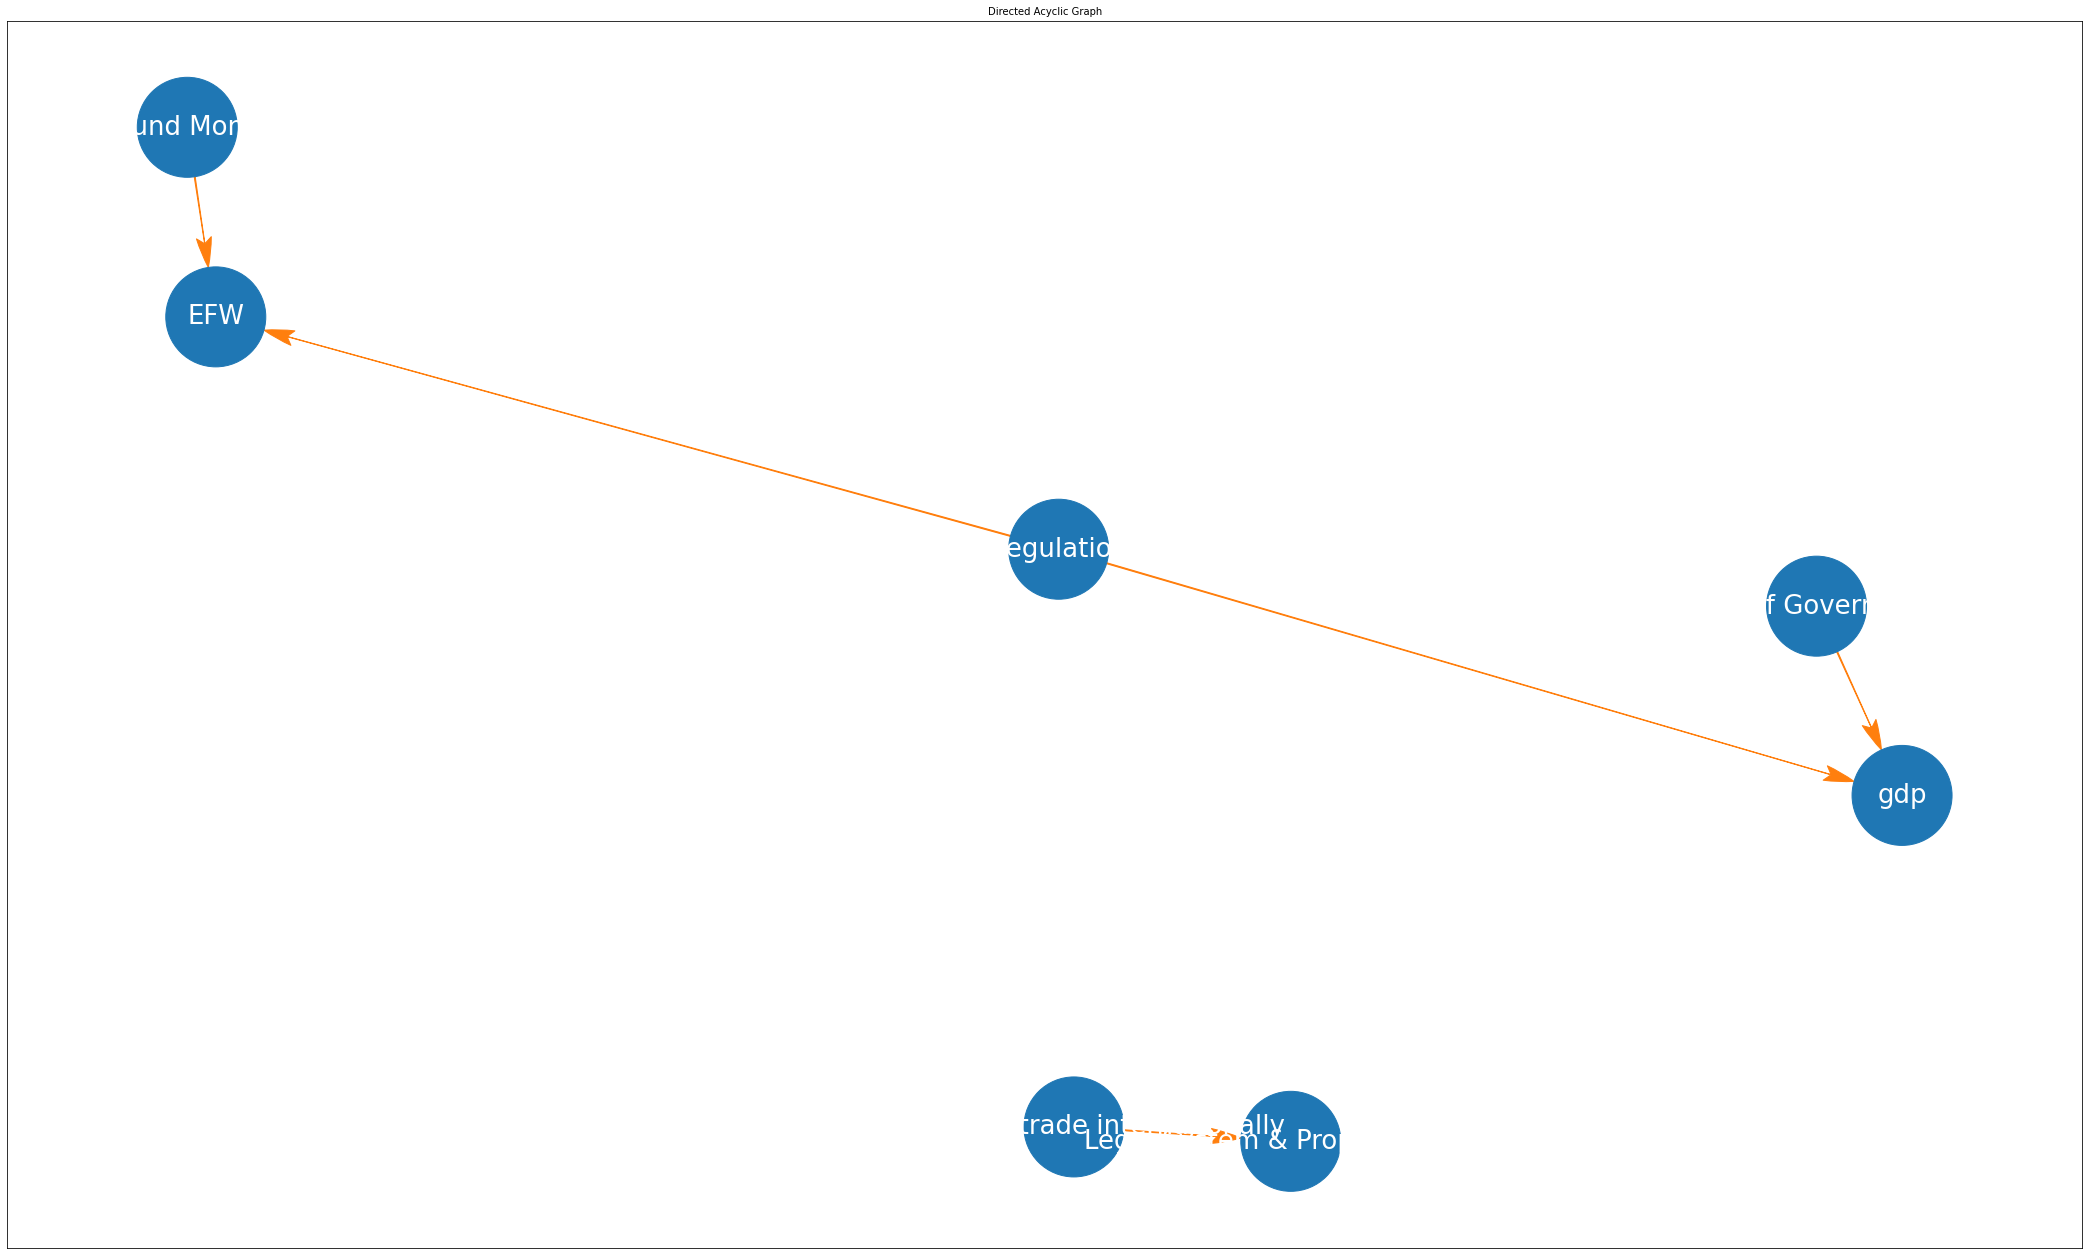

In [23]:
from matplotlib.patches import ArrowStyle

def graph_DAG(edges, df, title = ""):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (30,18))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 10)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 10000,
                     with_labels=True,  arrows=True,
                     font_color = "white",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)

graph_DAG(edges, df, title = "Directed Acyclic Graph")
edges